##### Taco VS Raw

1. A[i,j] = B[i,j] * C[j,i]

Experiment 1:
    1. Sparsity is equal in both of them and increase the dimension.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import math

In [43]:
def load_csv(filename):
    """
    Loads a CSV file and returns a DataFrame.
    """
    df = pd.read_csv(filename, index_col=False)
    return df

In [53]:
def plot_dimension_vs_time_grid(
    dataframes, labels, save_path,
    markers=None, linestyles=None,
    figsize=(16, 10), 
    logy=False, 
    max_rows=1000, 
    plots_per_row=2
):
    """
    Plot 'Dimension vs Time' for multiple DataFrames in a grid layout (e.g., 3 plots per row).
    Each DataFrame must have columns: ['Dimension', 'Unzipper_Time', 'TACO_Time', 'Sparsity'].
    """

    num_plots = len(dataframes)
    num_rows = math.ceil(num_plots / plots_per_row)

    if markers is None:
        markers = ['o', 's', '^', 'x', 'D'] * len(dataframes)
    if linestyles is None:
        linestyles = ['-', '--', '-.', ':'] * len(dataframes)

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=figsize)
    axes = axes.flatten() if num_rows > 1 or plots_per_row > 1 else [axes]

    for i, (df, label) in enumerate(zip(dataframes, labels)):
        ax = axes[i]
        df_capped = df.iloc[:max_rows].copy()

        # Extract sparsity or NNZ info
        sparsity = df_capped['Sparsity'].iloc[0] if 'Sparsity' in df_capped else None
        subtitle = f"{label} (Sparsity={sparsity}%)" if sparsity is not None else label

        # Plot Unzipper
        ax.plot(
            df_capped['Dimension'], 
            df_capped['Unzipper_Time'], 
            marker='', 
            linestyle=linestyles[0],
            lw=0.8,
            label=f"{label} (Unzipper)"
        )

        # Plot TACO
        ax.plot(
            df_capped['Dimension'], 
            df_capped['TACO_Time'], 
            marker='', 
            linestyle=linestyles[0],
            lw=0.8,
            label=f"{label} (TACO)"
        )

        ax.set_title(subtitle)
        ax.set_xlabel("Dimension")
        ax.set_ylabel("Time (s)")
        ax.grid(True, linestyle=':', alpha=0.6)
        ax.legend(fontsize=8)

        if logy:
            ax.set_yscale('log')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format="pdf")
        print(f"Plot saved to {save_path}")

    plt.show()

Plot saved to ./images/kernel1/rst1.pdf


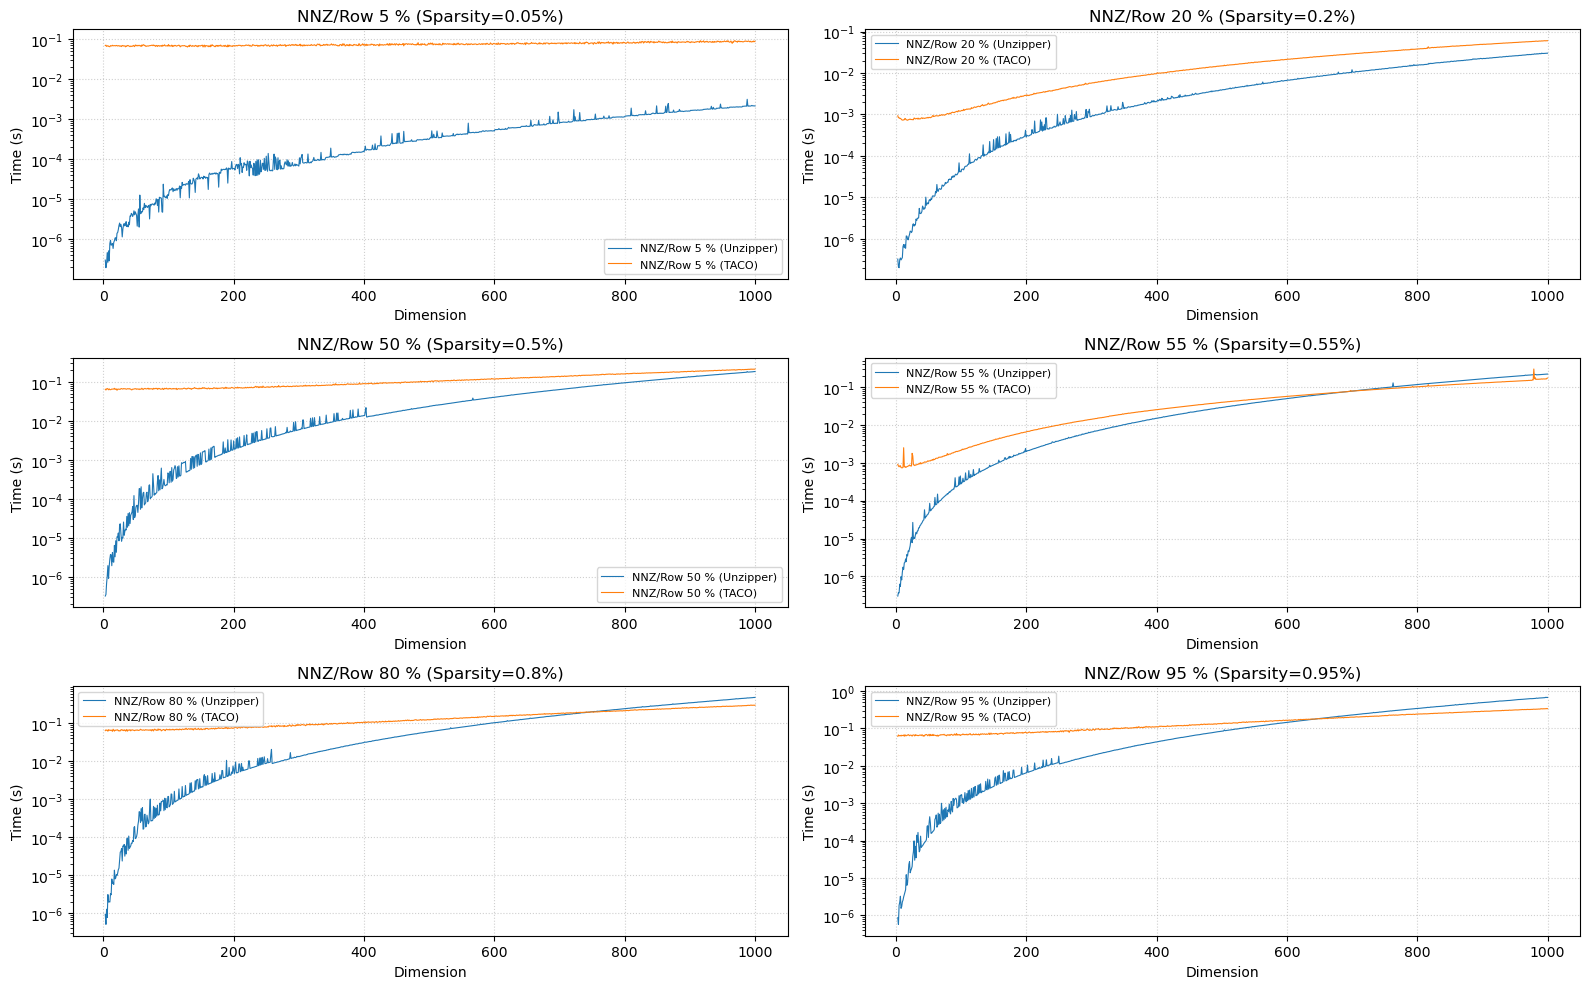

In [ ]:
# files = [
#     "./kernel1/results_0_5.csv",
#     "./kernel1/results_0_10.csv",
#     "./kernel1/results_0_15.csv",
#     "./kernel1/results_0_20.csv",
#     "./kernel1/results_0_25.csv",
#     "./kernel1/results_0_30.csv",
#     "./kernel1/results_0_35.csv",
#     "./kernel1/results_0_40.csv",
#     "./kernel1/results_0_45.csv",
#     "./kernel1/results_0_50.csv",
#     "./kernel1/results_0_55.csv",
#     "./kernel1/results_0_60.csv",
#     "./kernel1/results_0_65.csv",
#     "./kernel1/results_0_70.csv",
#     "./kernel1/results_0_75.csv",
#     "./kernel1/results_0_80.csv",
#     "./kernel1/results_0_85.csv",
#     "./kernel1/results_0_90.csv",
#     "./kernel1/results_0_95.csv",
# ]

files = [
    "./kernel1/results_0_5.csv",
    "./kernel1/results_0_20.csv",
    "./kernel1/results_0_50.csv",
    "./kernel1/results_0_55.csv",
    "./kernel1/results_0_80.csv",
    "./kernel1/results_0_95.csv",
]

dfs = []
exp_names = []
for file in files:
    dfs.append(load_csv(file))
    parsity_label = file.split("results_0_")[-1].split(".csv")[0]
    exp_names.append(f"NNZ/Row {parsity_label} %")
    


plot_dimension_vs_time_grid(
    dfs,
    exp_names,
    save_path="./images/kernel1/rst1.pdf",
    logy=True
)

2. A(i, j) = B(i, k) * C(k, j)

Experiment 1:
    Sparsity is equal in both of them and increase the dimension.

Plot saved to ./images/kernel2/rst1.pdf


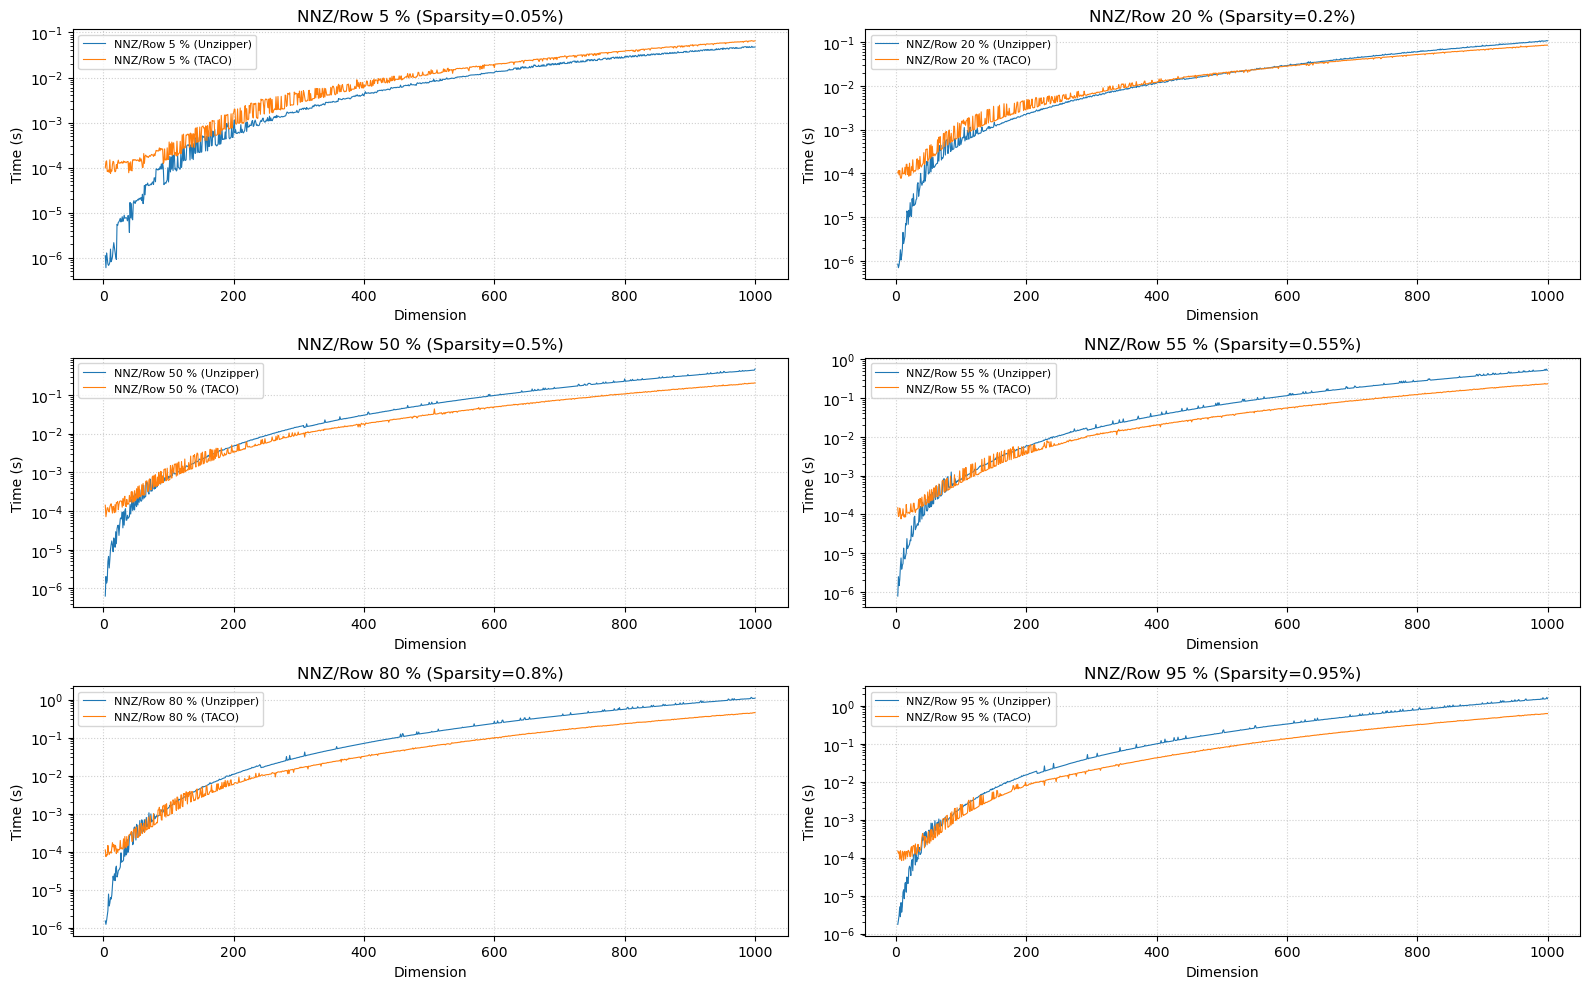

In [ ]:
files = [
    "./kernel2/results_5.csv",
    "./kernel2/results_20.csv",
    "./kernel2/results_50.csv",
    "./kernel2/results_55.csv",
    "./kernel2/results_80.csv",
    "./kernel2/results_95.csv",
]

dfs = []
exp_names = []
for file in files:
    dfs.append(load_csv(file))
    parsity_label = file.split("results_")[-1].split(".csv")[0]
    exp_names.append(f"NNZ/Row {parsity_label} %")
    


plot_dimension_vs_time_grid(
    dfs,
    exp_names,
    save_path="./images/kernel2/rst1.pdf",
    logy=True
)

A(i, j) = B(i, k)  * C(k, j) * D(k, j)

Experiment 1:
    Sparsity is equal in both of them and increase the dimension.

Plot saved to ./images/kernel3/rst1.pdf


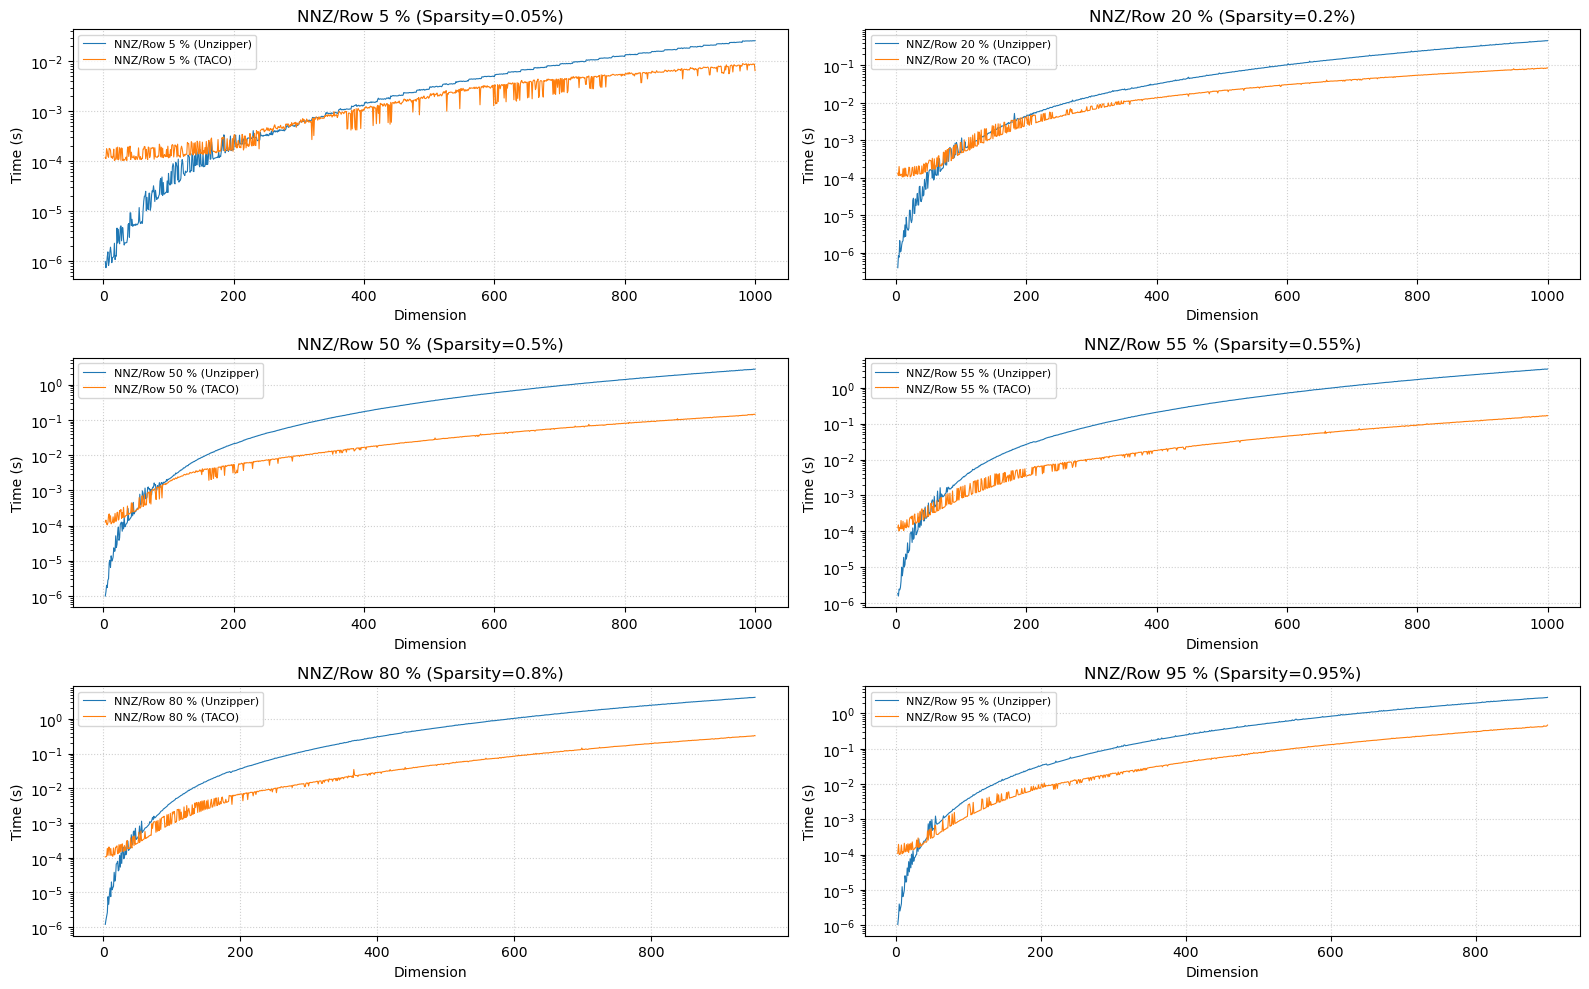

In [56]:
files = [
    "./kernel3/results_5.csv",
    "./kernel3/results_20.csv",
    "./kernel3/results_50.csv",
    "./kernel3/results_55.csv",
    "./kernel3/results_80.csv",
    "./kernel3/results_95.csv",
]

dfs = []
exp_names = []
for file in files:
    dfs.append(load_csv(file))
    parsity_label = file.split("results_")[-1].split(".csv")[0]
    exp_names.append(f"NNZ/Row {parsity_label} %")
    


plot_dimension_vs_time_grid(
    dfs,
    exp_names,
    save_path="./images/kernel3/rst1.pdf",
    logy=True
)